In [1]:
import numpy as np
import random
from itertools import product
from torch import tensor
import pickle
import matplotlib.pyplot as plt
import torch
import io

In [2]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [3]:
with open('/Users/masha/OneDrive/Документы/7 семестр/ВКР/код/text_1/SGD/sgd_tresults.pkl', 'rb') as f:
        arr = CPU_Unpickler(f).load()
        test_accuracy_history_sgd = arr["acc"]
        test_loss_history_sgd = arr["loss"]
        loss_in_training_sgd = arr["loss_train"]
        time_learning_sgd = arr["time"]
        
with open('/Users/masha/OneDrive/Документы/7 семестр/ВКР/код/text_1/K-FAC/kfc_tresults.pkl', 'rb') as f:
        arr = CPU_Unpickler(f).load()
        test_accuracy_history_kfc = arr["acc"]
        test_loss_history_kfc= arr["loss"]
        loss_in_training_kfc = arr["loss_train"]
        time_learning_kfc = arr["time"]
        
with open('/Users/masha/OneDrive/Документы/7 семестр/ВКР/код/text_1/SAM/sam_tresults.pkl', 'rb') as f:
        arr = CPU_Unpickler(f).load()
        test_accuracy_history_sam = arr["acc"]
        test_loss_history_sam= arr["loss"]
        loss_in_training_sam = arr["loss_train"]
        time_learning_sam = arr["time"]
        
with open('/Users/masha/OneDrive/Документы/7 семестр/ВКР/код/text_1/LION/lion_tresults.pkl', 'rb') as f:
        arr = CPU_Unpickler(f).load()
        test_accuracy_history_lion = arr["acc"]
        test_loss_history_lion = arr["loss"]
        loss_in_training_lion = arr["loss_train"]
        time_learning_lion = arr["time"]

In [4]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

<Figure size 1080x720 with 0 Axes>

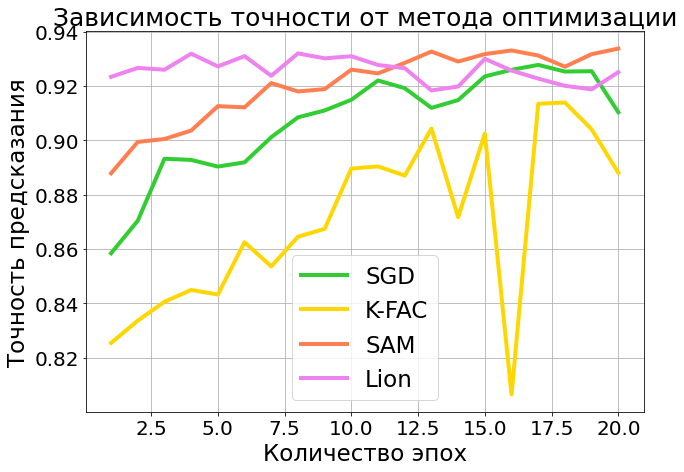

In [5]:
fig = plt.figure(figsize = (15, 10))
fig = plt.figure(figsize = (10, 7))
plt.title('Зависимость точности от метода оптимизации', fontsize=25)
plt.xlabel('Количество эпох', fontsize=23)
plt.ylabel('Точность предсказания', fontsize=23)


plt.plot(range(1, 21), test_accuracy_history_sgd, label = 'SGD', linewidth=4, color='limegreen')
plt.plot(range(1, 21), test_accuracy_history_kfc, label = 'K-FAC', linewidth=4, color='gold')
plt.plot(range(1, 21), test_accuracy_history_sam, label = 'SAM', linewidth=4, color='coral')
plt.plot(range(1, 21), test_accuracy_history_lion, label = 'Lion', linewidth=4, color='violet')

plt.legend(fontsize = 23)
plt.grid(True)

plt.savefig('Test_accuracy_history.pdf')

<Figure size 1080x720 with 0 Axes>

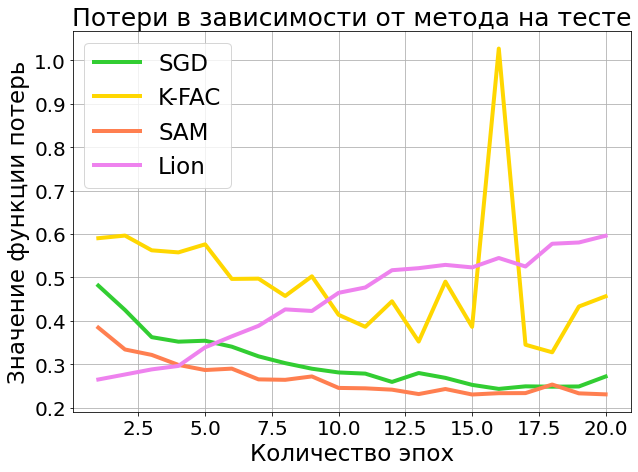

In [6]:
fig = plt.figure(figsize = (15, 10))
fig = plt.figure(figsize = (10, 7))
plt.title('Потери в зависимости от метода на тесте', fontsize=25)
plt.xlabel('Количество эпох', fontsize=23)
plt.ylabel('Значение функции потерь', fontsize=23)


plt.plot(range(1, 21), list(map(float, test_loss_history_sgd)), label = 'SGD', linewidth=4, color='limegreen')
plt.plot(range(1, 21), list(map(float, test_loss_history_kfc)), label = 'K-FAC', linewidth=4, color='gold')
plt.plot(range(1, 21), list(map(float, test_loss_history_sam)), label = 'SAM', linewidth=4, color='coral')
plt.plot(range(1, 21), list(map(float, test_loss_history_lion)), label = 'Lion', linewidth=4, color='violet')

plt.legend(fontsize = 23)
plt.grid(True)

plt.savefig('Test_loss_history.pdf')

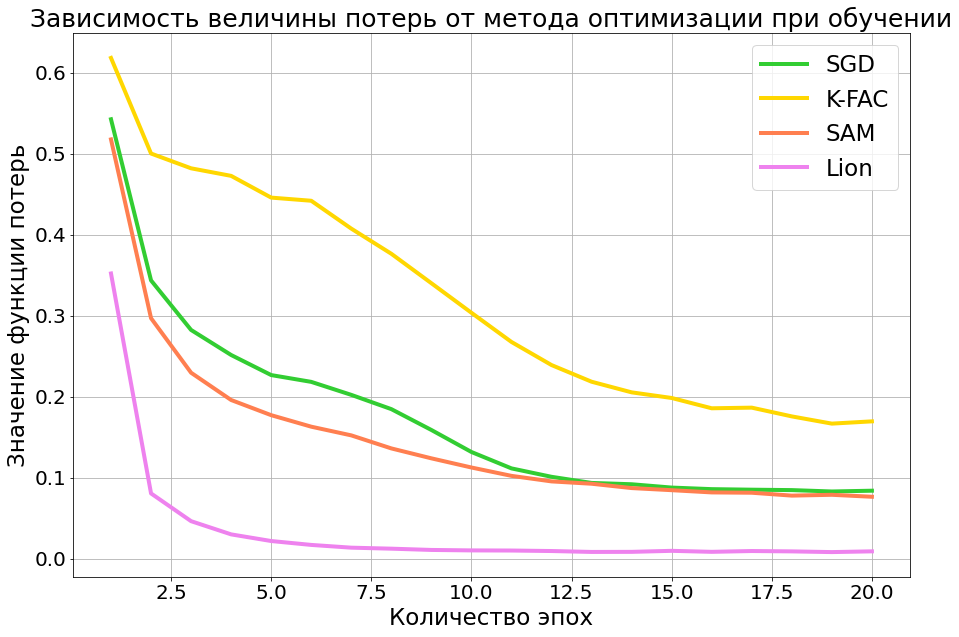

In [17]:
fig = plt.figure(figsize = (15, 10))
plt.title('Зависимость величины потерь от метода оптимизации при обучении', fontsize=25)
plt.xlabel('Количество эпох', fontsize=23)
plt.ylabel('Значение функции потерь', fontsize=23)


plt.plot(range(1, 21), loss_in_training_sgd, label = 'SGD', linewidth=4, color='limegreen')
plt.plot(range(1, 21), loss_in_training_kfc, label = 'K-FAC', linewidth=4, color='gold')
plt.plot(range(1, 21), loss_in_training_sam, label = 'SAM', linewidth=4, color='coral')
plt.plot(range(1, 21), loss_in_training_lion, label = 'Lion', linewidth=4, color='violet')

plt.legend(fontsize = 23)
plt.grid(True)

plt.savefig('Train_loss_history.pdf')

<Figure size 1080x720 with 0 Axes>

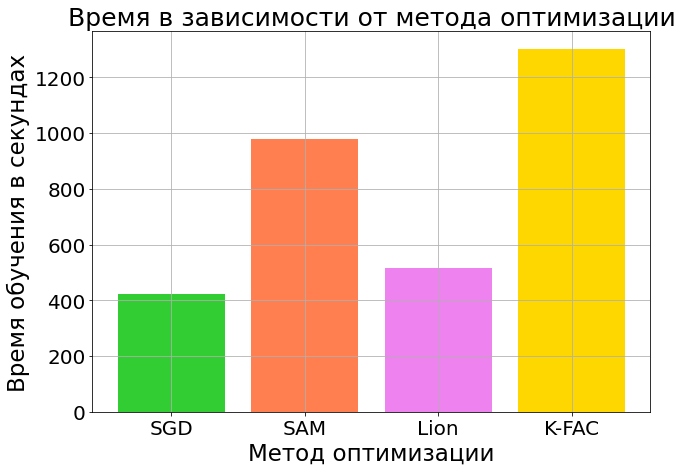

In [7]:
fig = plt.figure(figsize = (15, 10))
fig = plt.figure(figsize = (10, 7))
plt.title('Время в зависимости от метода оптимизации', fontsize=25)
plt.xlabel('Метод оптимизации', fontsize=23)
plt.ylabel('Время обучения в секундах', fontsize=23)

x = ['SGD', 'SAM', 'Lion', 'K-FAC']
y = [sum(time_learning_sgd), sum(time_learning_sam), sum(time_learning_lion), sum(time_learning_kfc)]

# plt.bar(x, y, color = ['limegreen', 'coral', 'c', 'orange'])
plt.bar(x, y, color = ['limegreen', 'coral', 'violet', 'gold'])

plt.grid(True)

plt.savefig('Time_learning.pdf')

In [8]:
with open('/Users/masha/OneDrive/Документы/7 семестр/ВКР/код/text_1/SGD/sgd_tresults_91.pkl', 'rb') as f:
#         arr = pickle.load(f)
        arr = CPU_Unpickler(f).load()
        test_accuracy_history_sgd = arr["acc"]
        test_loss_history_sgd = arr["loss"]
        loss_in_training_sgd = arr["loss_train"]
        time_learning_sgd = arr["time"]
        
with open('/Users/masha/OneDrive/Документы/7 семестр/ВКР/код/text_1/K-FAC/kfc_tresults_91.pkl', 'rb') as f:
#         arr = pickle.load(f)
        arr = CPU_Unpickler(f).load()
        test_accuracy_history_kfc = arr["acc"]
        test_loss_history_kfc= arr["loss"]
        loss_in_training_kfc = arr["loss_train"]
        time_learning_kfc = arr["time"]
        
with open('/Users/masha/OneDrive/Документы/7 семестр/ВКР/код/text_1/SAM/sam_tresults_91.pkl', 'rb') as f:
#         arr = pickle.load(f)
        arr = CPU_Unpickler(f).load()
        test_accuracy_history_sam = arr["acc"]
        test_loss_history_sam= arr["loss"]
        loss_in_training_sam = arr["loss_train"]
        time_learning_sam = arr["time"]
        
with open('/Users/masha/OneDrive/Документы/7 семестр/ВКР/код/text_1/LION/lion_tresults_91.pkl', 'rb') as f:
#         arr = pickle.load(f)
        arr = CPU_Unpickler(f).load()
        test_accuracy_history_lion = arr["acc"]
        test_loss_history_lion= arr["loss"]
        loss_in_training_lion = arr["loss_train"]
        time_learning_lion = arr["time"]

<Figure size 1080x720 with 0 Axes>

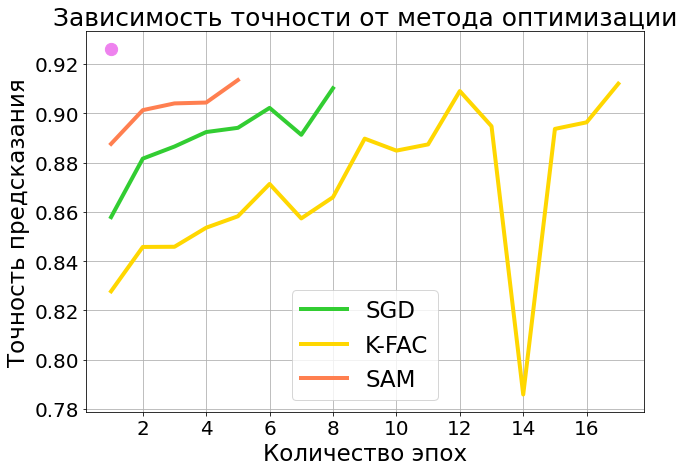

In [9]:
fig = plt.figure(figsize = (15, 10))
fig = plt.figure(figsize = (10, 7))
plt.title('Зависимость точности от метода оптимизации', fontsize=25)
plt.xlabel('Количество эпох', fontsize=23)
plt.ylabel('Точность предсказания', fontsize=23)


plt.plot(range(1, len(test_accuracy_history_sgd)+1), test_accuracy_history_sgd, label = 'SGD', linewidth=4, color='limegreen')
plt.plot(range(1, len(test_accuracy_history_kfc)+1), test_accuracy_history_kfc, label = 'K-FAC', linewidth=4, color='gold')
plt.plot(range(1, len(test_accuracy_history_sam)+1), test_accuracy_history_sam, label = 'SAM', linewidth=4, color='coral')
# plt.plot(range(1, len(test_accuracy_history_lion)+1), test_accuracy_history_lion, label = 'Lion', linewidth=3, color='violet')
plt.scatter(1, test_accuracy_history_lion[0], s=150, c='violet')

plt.legend(fontsize = 23)
plt.grid(True)

plt.savefig('Test_accuracy_history_91.pdf')

<Figure size 1080x720 with 0 Axes>

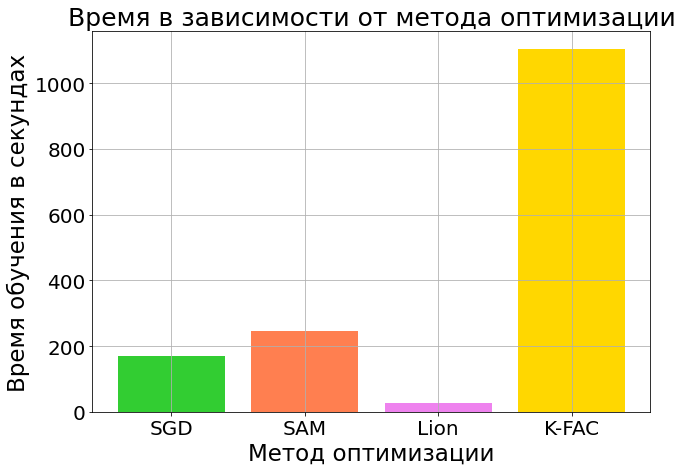

In [10]:
fig = plt.figure(figsize = (15, 10))
fig = plt.figure(figsize = (10, 7))
plt.title('Время в зависимости от метода оптимизации', fontsize=25)
plt.xlabel('Метод оптимизации', fontsize=23)
plt.ylabel('Время обучения в секундах', fontsize=23)

x = ['SGD', 'SAM', 'Lion', 'K-FAC']
y = [sum(time_learning_sgd), sum(time_learning_sam), sum(time_learning_lion), sum(time_learning_kfc)]

# plt.bar(x, y, color = ['limegreen', 'coral', 'c', 'orange'])
plt.bar(x, y, color = ['limegreen', 'coral', 'violet', 'gold'])

plt.grid(True)
plt.savefig('Time_learning_91.pdf')